In [ ]:
# Solution 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

path_to_data = 'https://raw.githubusercontent.com/armoutihansen/EEMP2020/main/datasets/AMP_Data.csv'
df = pd.read_csv(path_to_data)

In [ ]:
# Solution 2

cols = ['roce','lean1','lean2','perf1','perf2','perf3','perf4',
        'perf5','perf6','perf7','perf8','perf9','perf10','talent1','talent2',
        'talent3','talent4','talent5','talent6']

df = df[cols]

df = df.dropna()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6339 entries, 0 to 7093
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   roce     6339 non-null   float64
 1   lean1    6339 non-null   float64
 2   lean2    6339 non-null   float64
 3   perf1    6339 non-null   float64
 4   perf2    6339 non-null   float64
 5   perf3    6339 non-null   float64
 6   perf4    6339 non-null   float64
 7   perf5    6339 non-null   float64
 8   perf6    6339 non-null   float64
 9   perf7    6339 non-null   float64
 10  perf8    6339 non-null   float64
 11  perf9    6339 non-null   float64
 12  perf10   6339 non-null   float64
 13  talent1  6339 non-null   float64
 14  talent2  6339 non-null   float64
 15  talent3  6339 non-null   float64
 16  talent4  6339 non-null   float64
 17  talent5  6339 non-null   float64
 18  talent6  6339 non-null   float64
dtypes: float64(19)
memory usage: 990.5 KB
None


In [ ]:
# Solution 3
cols.remove('roce')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[cols],
                                                    df['roce'], train_size=0.75, random_state=181)

R2: 0.0016684381846077123
    feature     coef:
0     lean1  0.069722
1     lean2  0.370949
2     perf1 -0.301342
3     perf2  0.579411
4     perf3 -0.393313
5     perf4  0.091155
6     perf5 -0.765803
7     perf6  0.676227
8     perf7 -0.154743
9     perf8  0.653552
10    perf9  0.528720
11   perf10 -0.365931
12  talent1 -0.428133
13  talent2  0.467938
14  talent3  0.768649
15  talent4  0.140533
16  talent5  1.116684
17  talent6 -0.097567


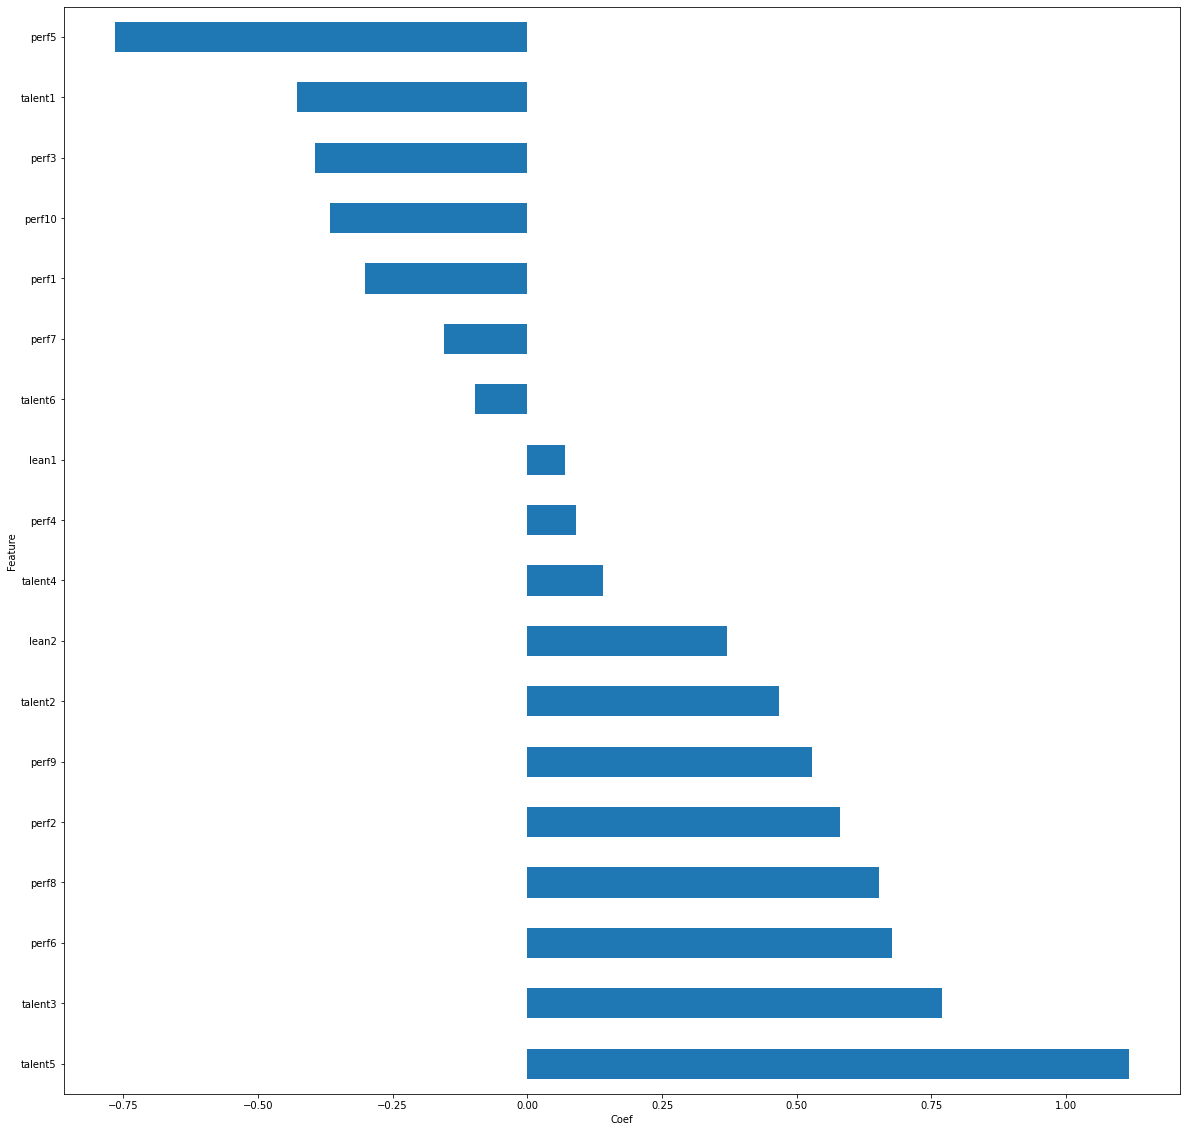

In [ ]:
# Solution 4
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

pred = reg.predict(X_test)

from sklearn.metrics import r2_score

print('R2:', r2_score(y_test, pred))

print(pd.DataFrame({'feature': X_train.columns, 'coef:': reg.coef_}))

plt.figure(figsize=(20,20))
(pd.Series(reg.coef_, index=X_train.columns).nlargest(18).plot(kind='barh')) 
plt.xlabel('Coef')
plt.ylabel('Feature')
plt.show;

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.5min finished


R2:  0.06409021453476371


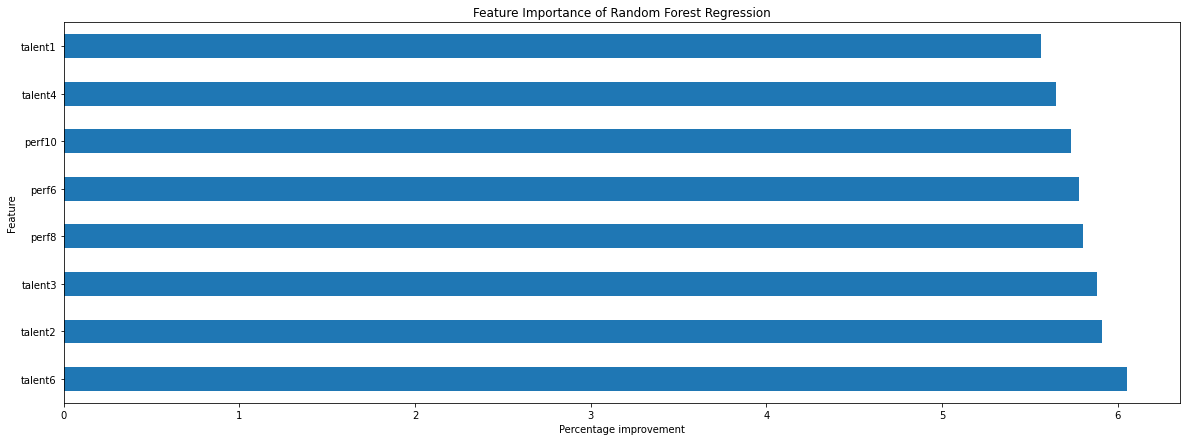

In [ ]:
# Solution 5
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': np.arange(500,1001,100),
              'max_features': np.arange(1,19),}
ran_grid = RandomizedSearchCV(RandomForestRegressor(random_state=181),
                        param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10, verbose=1, n_jobs=-1)

ran_grid.fit(X_train, y_train)

pred = ran_grid.predict(X_test)

print('R2: ', r2_score(y_test, pred))

plt.figure(figsize=(20,7))
(pd.Series(ran_grid.best_estimator_.feature_importances_*100, index=X_train.columns).nlargest(8).plot(kind='barh')) 
plt.xlabel('Percentage improvement')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Regression')
plt.show;

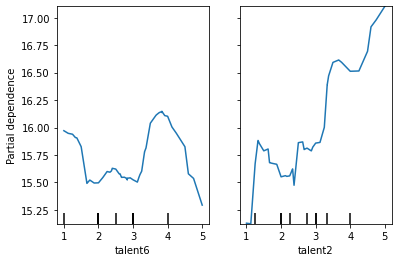

In [ ]:
# Solution 6
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(ran_grid, X_train, ['talent6', 'talent2'])